In [1]:
import sys

sys.path.append("../models/")

import numpy as np
import os
import pandas as pd  # just for the test
import torch

from torch.nn import Parameter
from torch.optim import Adam

from misc_functions import (
    preprocess_image,
    recreate_image,
    save_image,
    recreate_logo,
)

from plot_conv import *

import logomaker

from conv_LSTM_onehot import convLSTM

cnn_layer = 0
filter_pos = 0

nuc_to_ix = {
    "A": [1, 0, 0, 0],
    "G": [0, 1, 0, 0],
    "T": [0, 0, 1, 0],
    "C": [0, 0, 0, 1],
}
class_to_nuc = {v[0]: k for k, v in nuc_to_ix.items()}
t = 100
path_model = "../../data/models/convlstm_big.pt"
pretrained_model = convLSTM(
    input_dim=4,
    out_channels=4,
    stride=5,
    hidden_dim=60,
    hidden_out=140,
    output_dim=2,
    t=t,
).cpu()
pretrained_model.load_state_dict(
    torch.load(path_model, map_location=torch.device("cpu"))
)
pretrained_model = pretrained_model

layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)

# Layer visualization with pytorch hooks
opt_seq = layer_vis.visualise_layer1D().data.numpy()
print(opt_seq[0])
df = pd.DataFrame(opt_seq[0], columns=["A", "C", "G", "T"])
df = df.apply(lambda x: np.exp(x) / np.sum(np.exp(x)), axis=1)

/home/jorge/.local/lib/python3.6/site-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Iteration: 1 Loss: 0.04
Iteration: 2 Loss: -0.65
Iteration: 3 Loss: -1.52
Iteration: 4 Loss: -1.99
Iteration: 5 Loss: -2.51
Iteration: 6 Loss: -2.90
Iteration: 7 Loss: -3.09
Iteration: 8 Loss: -3.22
Iteration: 9 Loss: -3.44
Iteration: 10 Loss: -3.64
Iteration: 11 Loss: -3.72
Iteration: 12 Loss: -3.77
Iteration: 13 Loss: -3.82
Iteration: 14 Loss: -3.91
Iteration: 15 Loss: -4.03
Iteration: 16 Loss: -4.15
Iteration: 17 Loss: -4.27
Iteration: 18 Loss: -4.40
Iteration: 19 Loss: -4.48
Iteration: 20 Loss: -4.53
Iteration: 21 Loss: -4.59
Iteration: 22 Loss: -4.64
Iteration: 23 Loss: -4.69
Iteration: 24 Loss: -4.76
Iteration: 25 Loss: -4.83
Iteration: 26 Loss: -4.91
Iteration: 27 Loss: -4.99
Iteration: 28 Loss: -5.04
Iteration: 29 Loss: -5.09
[[ 1.72841704e+00  4.15836906e+00 -5.17199636e-01  3.70092988e+00]
 [ 4.01597559e-01  1.09948456e+00  2.09350705e+00  9.80202973e-01]
 [ 6.36595115e-02  2.88053203e+00  1.79977882e+00  2.38318771e-01]
 [ 3.90859455e-01  1.61409509e+00  1.14243579e+00  3.80

## First filter

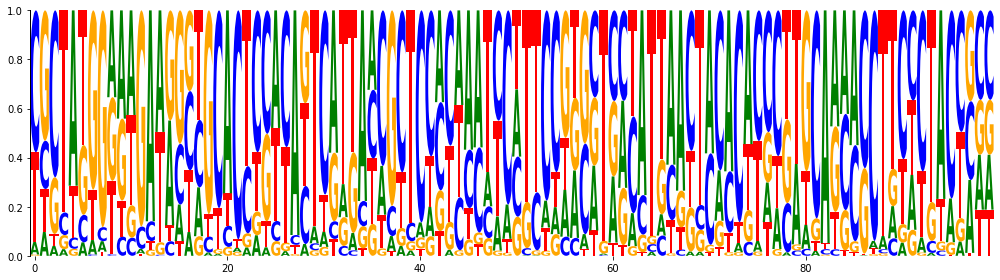

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 14, 4
fig, ax = plt.subplots(1, 1)
nn_logo = logomaker.Logo(df, ax=ax)
nn_logo.style_spines(visible=False)
nn_logo.style_spines(spines=["left"], visible=True, bounds=[0, 1])
fig.tight_layout()

In [3]:
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, 1)

# Layer visualization with pytorch hooks
opt_seq = layer_vis.visualise_layer1D().data.numpy()
print(opt_seq[0])
df = pd.DataFrame(opt_seq[0], columns=["A", "C", "G", "T"])
df = df.apply(lambda x: np.exp(x) / np.sum(np.exp(x)), axis=1)

Iteration: 1 Loss: -0.22
Iteration: 2 Loss: -0.54
Iteration: 3 Loss: -0.75
Iteration: 4 Loss: -0.94
Iteration: 5 Loss: -1.17
Iteration: 6 Loss: -1.47
Iteration: 7 Loss: -1.70
Iteration: 8 Loss: -1.99
Iteration: 9 Loss: -2.40
Iteration: 10 Loss: -2.90
Iteration: 11 Loss: -3.28
Iteration: 12 Loss: -3.58
Iteration: 13 Loss: -3.84
Iteration: 14 Loss: -4.20
Iteration: 15 Loss: -4.62
Iteration: 16 Loss: -5.07
Iteration: 17 Loss: -5.65
Iteration: 18 Loss: -6.28
Iteration: 19 Loss: -6.86
Iteration: 20 Loss: -7.40
Iteration: 21 Loss: -7.92
Iteration: 22 Loss: -8.26
Iteration: 23 Loss: -8.35
Iteration: 24 Loss: -8.33
Iteration: 25 Loss: -8.43
Iteration: 26 Loss: -8.57
Iteration: 27 Loss: -8.63
Iteration: 28 Loss: -8.72
Iteration: 29 Loss: -8.83
[[ 1.0380051   3.9422586   0.98908967  4.815296  ]
 [-0.03291176 -0.08110841  2.5022697   1.1424202 ]
 [ 5.309937    5.4311337  -0.44536933  1.2760016 ]
 [-1.051937    0.70456874  1.427235    3.8782175 ]
 [ 2.497017    0.64962655  3.8087025   2.3368847 ]


## Second filter

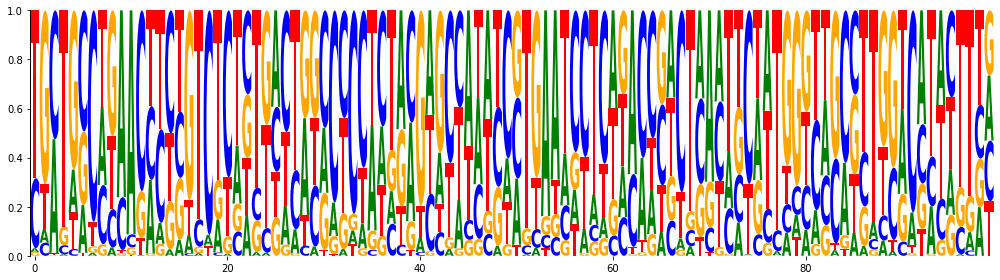

In [4]:
fig, ax = plt.subplots(1, 1)
nn_logo = logomaker.Logo(df, ax=ax)
nn_logo.style_spines(visible=False)
nn_logo.style_spines(spines=["left"], visible=True, bounds=[0, 1])
fig.tight_layout()

In [7]:
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, [0,1])

# Layer visualization with pytorch hooks
opt_seq = layer_vis.visualise_layer1D().data.numpy()
print(opt_seq[0])
df = pd.DataFrame(opt_seq[0], columns=["A", "C", "G", "T"])
df = df.apply(lambda x: np.exp(x) / np.sum(np.exp(x)), axis=1)

Iteration: 1 Loss: -0.04
Iteration: 2 Loss: -0.15
Iteration: 3 Loss: -0.24
Iteration: 4 Loss: -0.30
Iteration: 5 Loss: -0.35
Iteration: 6 Loss: -0.42
Iteration: 7 Loss: -0.46
Iteration: 8 Loss: -0.49
Iteration: 9 Loss: -0.54
Iteration: 10 Loss: -0.58
Iteration: 11 Loss: -0.61
Iteration: 12 Loss: -0.63
Iteration: 13 Loss: -0.65
Iteration: 14 Loss: -0.66
Iteration: 15 Loss: -0.68
Iteration: 16 Loss: -0.69
Iteration: 17 Loss: -0.71
Iteration: 18 Loss: -0.72
Iteration: 19 Loss: -0.73
Iteration: 20 Loss: -0.74
Iteration: 21 Loss: -0.76
Iteration: 22 Loss: -0.77
Iteration: 23 Loss: -0.78
Iteration: 24 Loss: -0.78
Iteration: 25 Loss: -0.79
Iteration: 26 Loss: -0.80
Iteration: 27 Loss: -0.80
Iteration: 28 Loss: -0.81
Iteration: 29 Loss: -0.81
[[ 1.12282276e+00  1.41567552e+00 -2.59931952e-01  1.75132239e+00]
 [ 2.28132749e+00  2.76525760e+00  4.09589052e+00  1.83438659e+00]
 [ 7.01955616e-01  3.34357905e+00  2.12560391e+00  2.42988205e+00]
 [ 2.71289229e-01  3.60028219e+00  2.22022280e-01  3.8

## Third filter

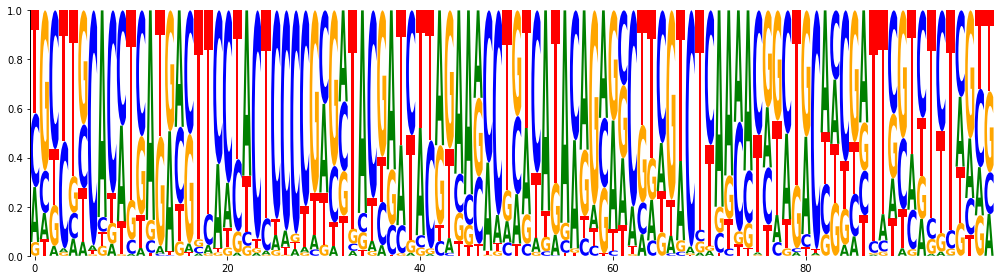

In [8]:
fig, ax = plt.subplots(1, 1)
nn_logo = logomaker.Logo(df, ax=ax)
nn_logo.style_spines(visible=False)
nn_logo.style_spines(spines=["left"], visible=True, bounds=[0, 1])
fig.tight_layout()